In [3]:
import pandas as pd

data = pd.read_csv("/Users/yaroslav.hrytsun/data/lb1/dds_ch2_nyt/nyt1.csv")
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [6]:
data.Age.unique()

array([ 36,  73,  30,  49,  47,   0,  46,  16,  52,  21,  57,  31,  40,
        38,  59,  61,  48,  29,  19,  23,  66,  44,  32,  22,  74,  65,
        63,  35,  33,  34,  43,  18,  17,  62,  27,  11,  42,  41,  14,
        64,  24,  26,  39,  71,  45,  28,  83,  79,  67,  51,  60,  58,
        53,  25,  50,  76,  15,  78,  55,  37,  56,  77,  85,  82,  13,
        70,  84,  54,  20,  10,  81,  68,  72,  69,  87,  80,  88,  12,
        86,  75,  89,   9,  96, 102,  98,  90,  99,  91,  92,  95,   8,
        94,  93,  97,   7, 100, 103, 107, 101, 108, 104])

In [4]:
data.groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,137106,137106,137106,137106
7,5,5,5,5
8,15,15,15,15
9,48,48,48,48
10,113,113,113,113
...,...,...,...,...
102,2,2,2,2
103,2,2,2,2
104,1,1,1,1


In [5]:
data[data.Age == 0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,137106,137106,137106,137106


In [6]:
data[data.Age > 0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,153070,153070,153070,153070
1,168265,168265,168265,168265


In [7]:
data_no_null_age = data[data.Age > 0]

<AxesSubplot: >

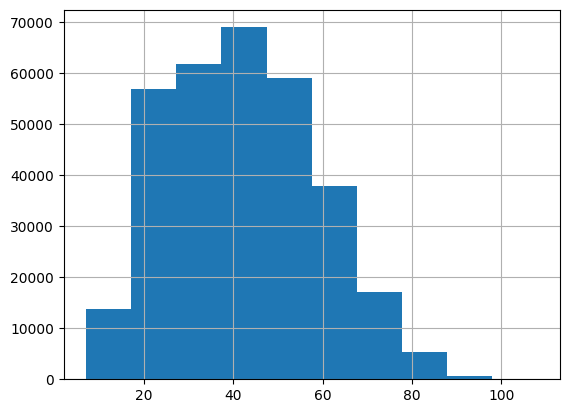

In [15]:
data_no_null_age.Age.hist()

In [12]:
def age_group(age):
    if age < 18:
        return "<18"
    elif 18 <= age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"

data_no_null_age['AgeGroup'] = data_no_null_age.Age.apply(lambda row: age_group(row))
data_no_null_age['AgeGroup']

def age_group_int(age):
    if age < 18:
        return 1
    elif 18 <= age <= 24:
        return 2
    elif 25 <= age <= 34:
        return 3
    elif 35 <= age <= 44:
        return 4
    elif 45 <= age <= 54:
        return 5
    elif 55 <= age <= 64:
        return 6
    elif age >= 65:
        return 7


data_no_null_age['AgeGroupInt'] = data_no_null_age.Age.apply(lambda row: age_group_int(row))

        

/var/folders/_3/hs0s8fsn3rzbyb11px7cn7qw0000gp/T/ipykernel_5906/221367070.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age['AgeGroup'] = data_no_null_age.Age.apply(lambda row: age_group(row))
/var/folders/_3/hs0s8fsn3rzbyb11px7cn7qw0000gp/T/ipykernel_5906/221367070.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age['AgeGroupInt'] = data_no_null_age.Age.apply(lambda row: age_group_int(row))


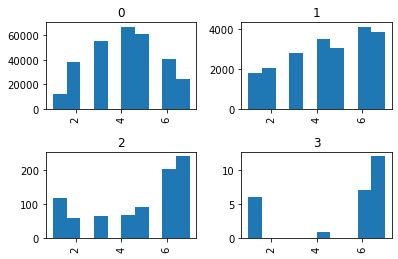

In [14]:
from matplotlib import pyplot as plt
data_no_null_age.hist(column=["AgeGroupInt"], by="Clicks")
plt.show()

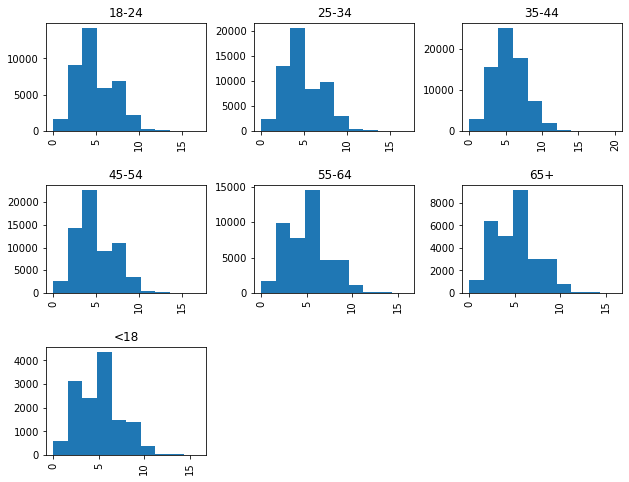

In [17]:
data_no_null_age.hist(column=["Impressions"], by="AgeGroup", figsize=(10, 8))
plt.show()


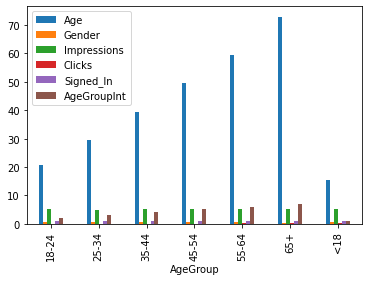

In [18]:
data_no_null_age = data_no_null_age.groupby(['AgeGroup']).mean()
data_no_null_age.plot.bar()
plt.show()


In [19]:
print(data_no_null_age.var())

Age            440.192311
Gender           0.008640
Impressions      0.000102
Clicks           0.002218
Signed_In        0.000000
AgeGroupInt      4.666667
dtype: float64
